<a href="https://colab.research.google.com/github/sdeva90/Python/blob/master/Colab/Learner%2BNotebook%2B_%2BFull%2BCode%2BVersion%2B_%2BPotential%2BCustomers%2BPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [2]:
# Importing the basic libraries we will require for the project

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Importing the Machine Learning models we require from Scikit-Learn
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder


# Importing the other functions we may require from Scikit-Learn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer

# To get diferent metric scores
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,precision_recall_curve,roc_curve,make_scorer

# Code to ignore warnings from function usage
import warnings;
import numpy as np
warnings.filterwarnings('ignore')


Loading the Data

In [3]:
from google.colab import drive
drive.mount('/content/drive')
# read the data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ExtraaLearn.csv')

Mounted at /content/drive


## Data Overview

- Observations
- Sanity checks

In [4]:
# returns the first 5 rows
df.head()
#last 5
df.tail()
# no of rows and columns
df.shape
# no of non-null counts
df.info()
#discriptive analysis
df.describe().T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434
status,4612.0,0.298569,0.457680,0.0,0.00000,0.000,1.00000,1.000


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

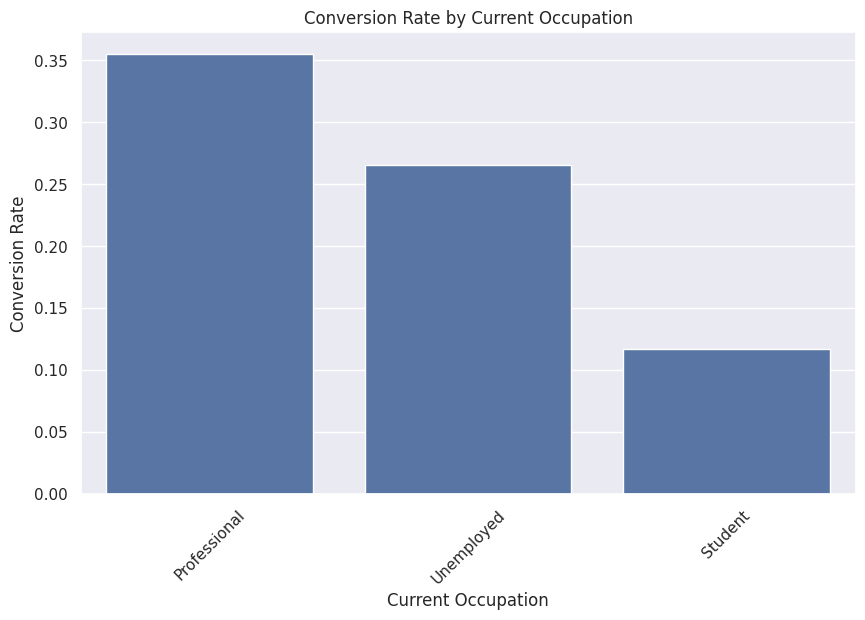

In [5]:
# 1. Analyze how current occupation affects lead status
occupation_lead_status = df.groupby(['current_occupation', 'status']).size().unstack().fillna(0)
occupation_lead_status['conversion_rate'] = occupation_lead_status[1] / (occupation_lead_status[0] + occupation_lead_status[1])
occupation_lead_status = occupation_lead_status.sort_values(by='conversion_rate', ascending=False)

# Plot the conversion rate by occupation
plt.figure(figsize=(10, 6))
sns.barplot(x=occupation_lead_status.index, y=occupation_lead_status['conversion_rate'])
plt.title('Conversion Rate by Current Occupation')
plt.xlabel('Current Occupation')
plt.ylabel('Conversion Rate')
plt.xticks(rotation=45)
plt.show()


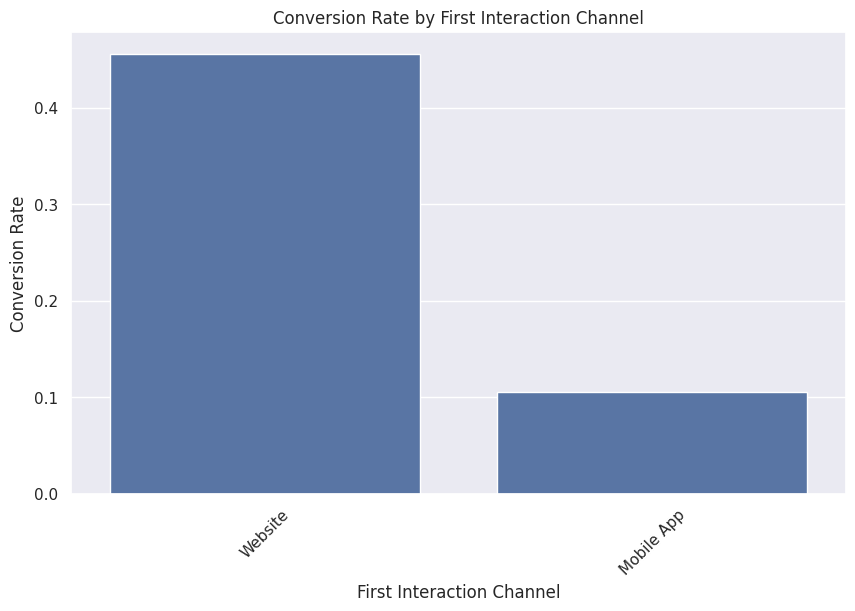

In [6]:
# 2. Analyze the impact of the first channel of interaction on lead status
interaction_lead_status = df.groupby(['first_interaction', 'status']).size().unstack().fillna(0)
interaction_lead_status['conversion_rate'] = interaction_lead_status[1] / (interaction_lead_status[0] + interaction_lead_status[1])
interaction_lead_status = interaction_lead_status.sort_values(by='conversion_rate', ascending=False)

# Plot the conversion rate by first interaction channel
plt.figure(figsize=(10, 6))
sns.barplot(x=interaction_lead_status.index, y=interaction_lead_status['conversion_rate'])
plt.title('Conversion Rate by First Interaction Channel')
plt.xlabel('First Interaction Channel')
plt.ylabel('Conversion Rate')
plt.xticks(rotation=45)
plt.show()


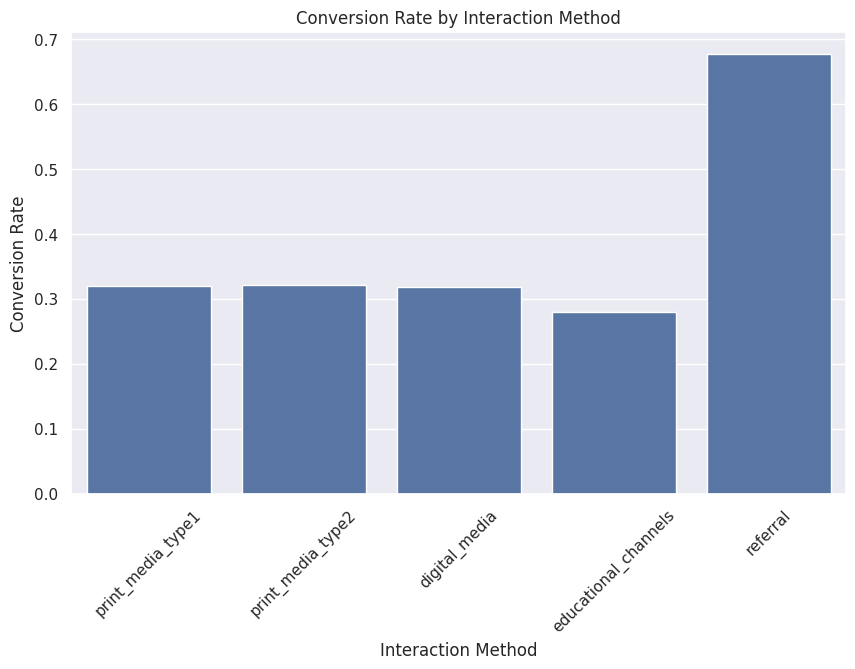

In [7]:
# 3. Analyze which way of interaction works best
interaction_methods = ['print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral']
interaction_effectiveness = {}

for method in interaction_methods:
    method_lead_status = df.groupby([method, 'status']).size().unstack().fillna(0)
    method_lead_status['conversion_rate'] = method_lead_status[1] / (method_lead_status[0] + method_lead_status[1])
    interaction_effectiveness[method] = method_lead_status.loc['Yes', 'conversion_rate'] if 'Yes' in method_lead_status.index else 0

# Plot the conversion rate by interaction method
plt.figure(figsize=(10, 6))
sns.barplot(x=list(interaction_effectiveness.keys()), y=list(interaction_effectiveness.values()))
plt.title('Conversion Rate by Interaction Method')
plt.xlabel('Interaction Method')
plt.ylabel('Conversion Rate')
plt.xticks(rotation=45)
plt.show()


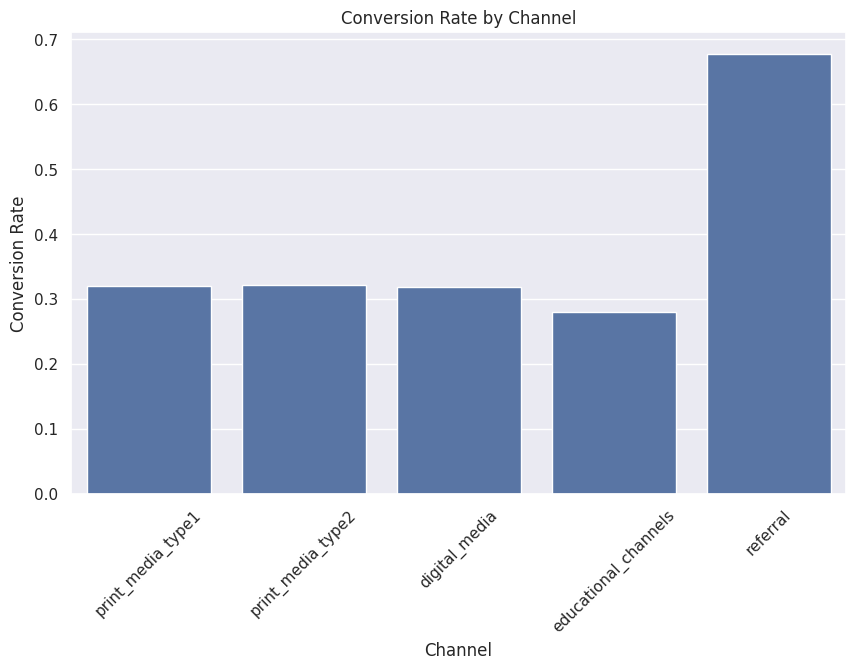

In [8]:
# 4. Analyze which channels have the highest lead conversion rate
channels = ['print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral']
conversion_rates = []
for channel in channels:
    channel_data = df.groupby([channel, 'status']).size().unstack().fillna(0)
    if 'Yes' in channel_data.index:
        conversion_rate = channel_data.loc['Yes', 1] / (channel_data.loc['Yes', 0] + channel_data.loc['Yes', 1])
        conversion_rates.append((channel, conversion_rate))
    else:
        conversion_rates.append((channel, 0))

# Convert to DataFrame for visualization
channel_conversion_rates = pd.DataFrame(conversion_rates, columns=['Channel', 'Conversion Rate'])

# Plot the conversion rate by channel
plt.figure(figsize=(10, 6))
sns.barplot(x='Channel', y='Conversion Rate', data=channel_conversion_rates)
plt.title('Conversion Rate by Channel')
plt.xlabel('Channel')
plt.ylabel('Conversion Rate')
plt.xticks(rotation=45)
plt.show()


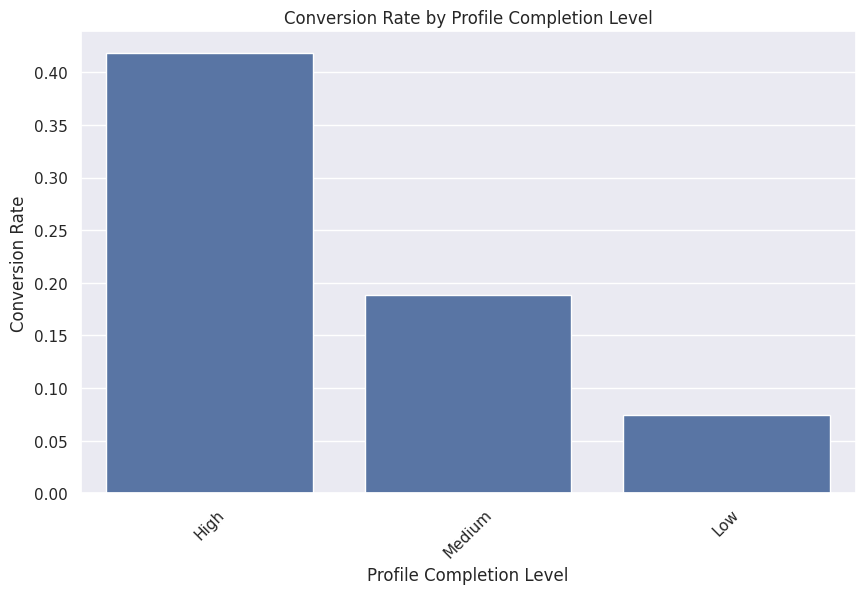

In [10]:
# 5. Analyze if having more details about a prospect increases the chances of conversion
profile_completion_lead_status = df.groupby(['profile_completed', 'status']).size().unstack().fillna(0)
profile_completion_lead_status['conversion_rate'] = profile_completion_lead_status[1] / (profile_completion_lead_status[0] + profile_completion_lead_status[1])
profile_completion_lead_status = profile_completion_lead_status.sort_values(by='conversion_rate', ascending=False)

# Plot the conversion rate by profile completion level
plt.figure(figsize=(10, 6))
sns.barplot(x=profile_completion_lead_status.index, y=profile_completion_lead_status['conversion_rate'])
plt.title('Conversion Rate by Profile Completion Level')
plt.xlabel('Profile Completion Level')
plt.ylabel('Conversion Rate')
plt.xticks(rotation=45)
plt.show()



Univariate Analysis:

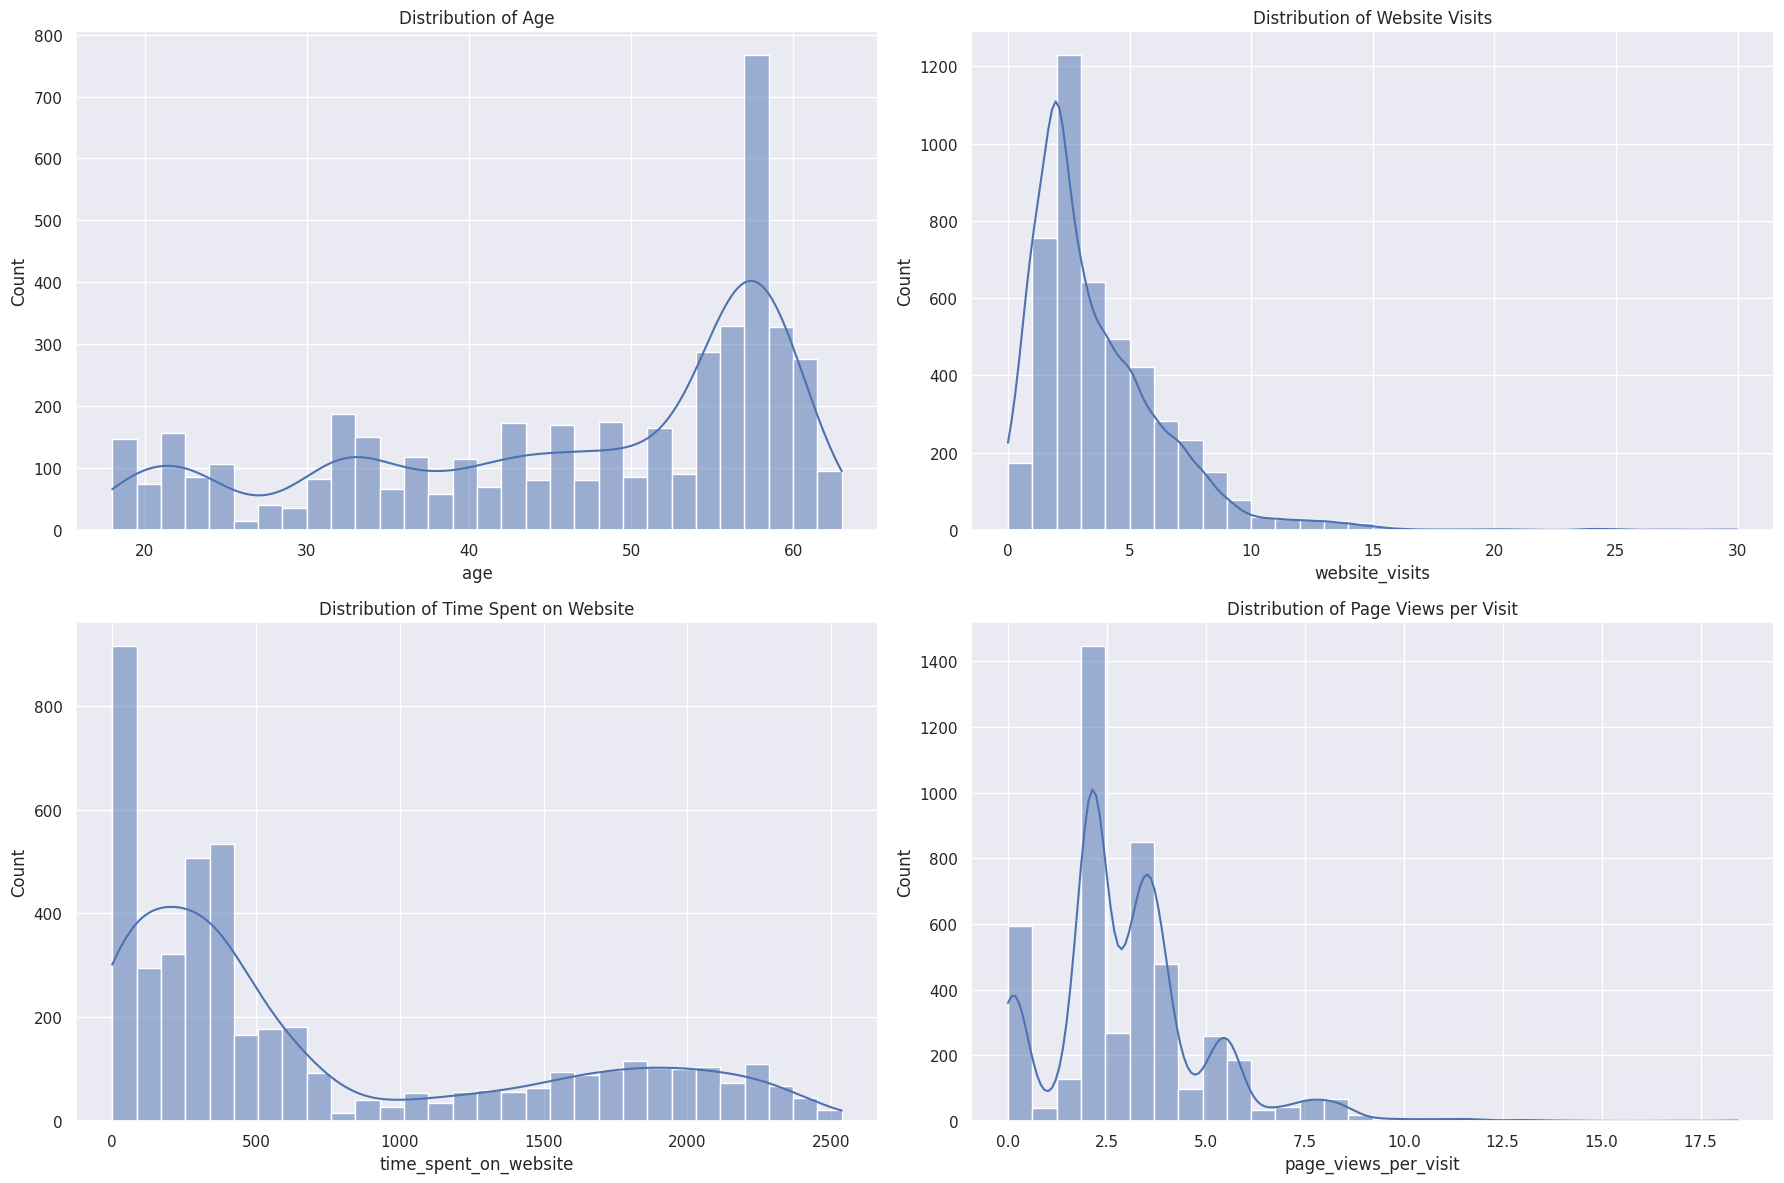

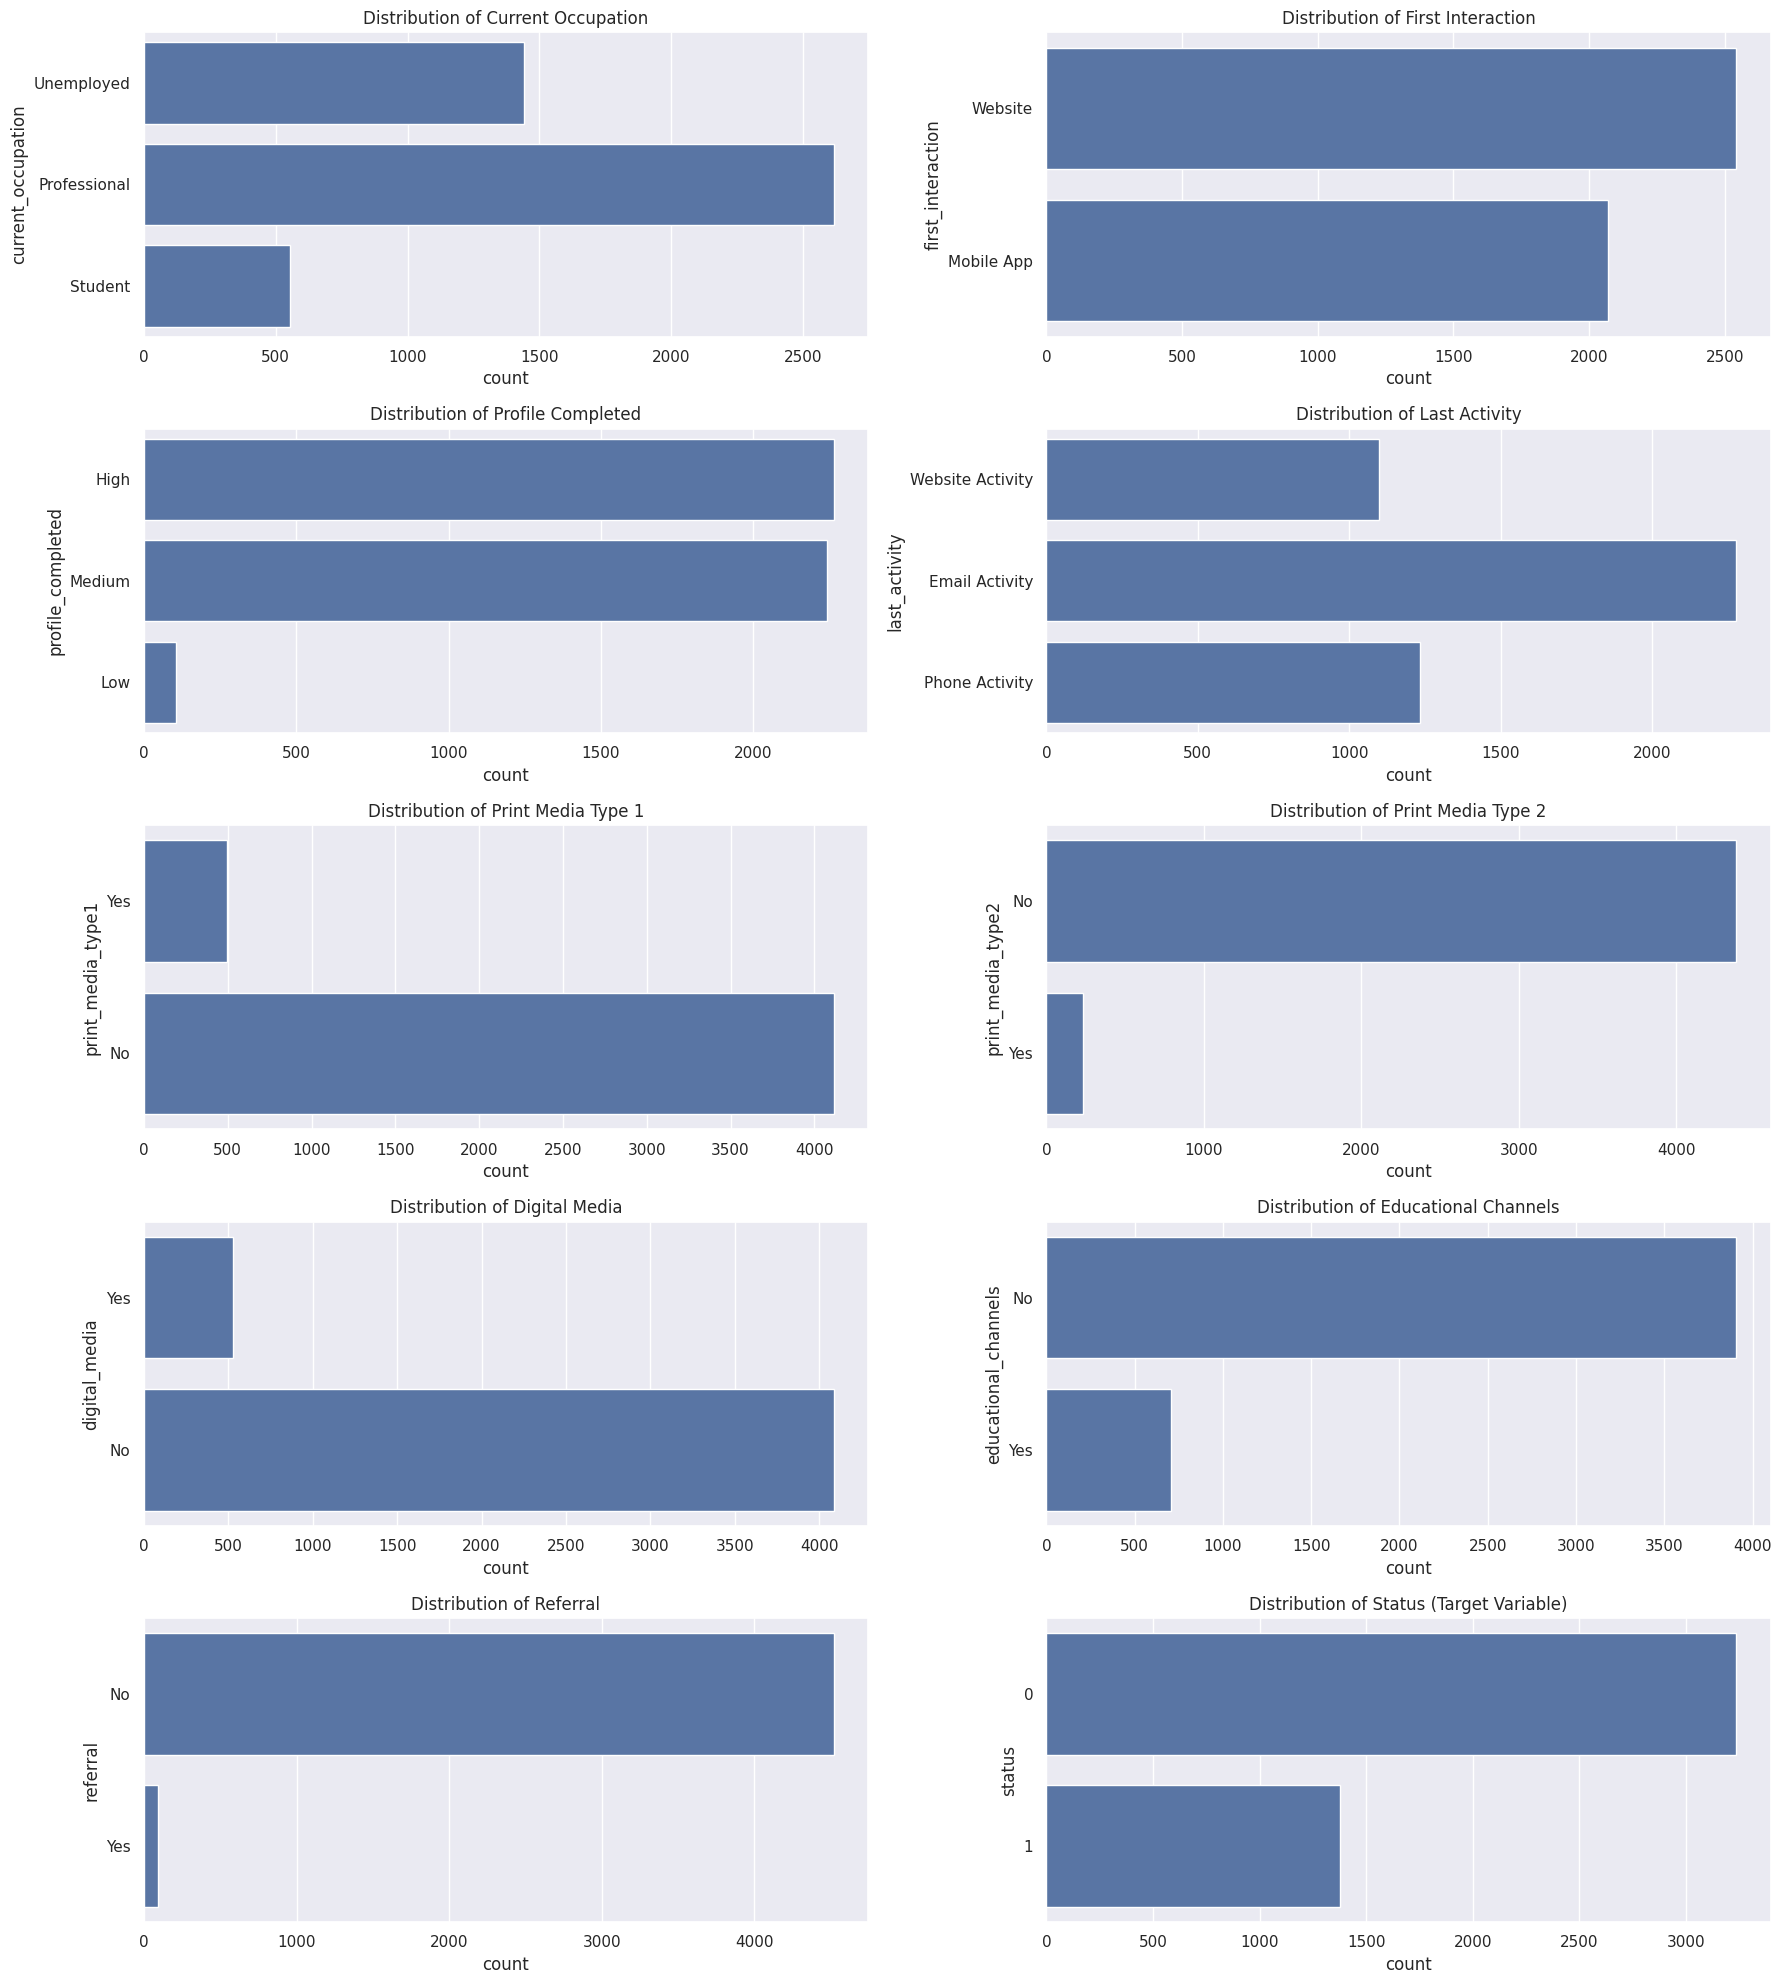

In [11]:
# Plot histograms for numerical variables
plt.figure(figsize=(18, 12))

# Age
plt.subplot(2, 2, 1)
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Distribution of Age')

# Website Visits
plt.subplot(2, 2, 2)
sns.histplot(df['website_visits'], bins=30, kde=True)
plt.title('Distribution of Website Visits')

# Time Spent on Website
plt.subplot(2, 2, 3)
sns.histplot(df['time_spent_on_website'], bins=30, kde=True)
plt.title('Distribution of Time Spent on Website')

# Page Views per Visit
plt.subplot(2, 2, 4)
sns.histplot(df['page_views_per_visit'], bins=30, kde=True)
plt.title('Distribution of Page Views per Visit')

plt.tight_layout()
plt.show()

# Plot count plots for categorical variables
plt.figure(figsize=(18, 20))

# Current Occupation
plt.subplot(5, 2, 1)
sns.countplot(y='current_occupation', data=df)
plt.title('Distribution of Current Occupation')

# First Interaction
plt.subplot(5, 2, 2)
sns.countplot(y='first_interaction', data=df)
plt.title('Distribution of First Interaction')

# Profile Completed
plt.subplot(5, 2, 3)
sns.countplot(y='profile_completed', data=df)
plt.title('Distribution of Profile Completed')

# Last Activity
plt.subplot(5, 2, 4)
sns.countplot(y='last_activity', data=df)
plt.title('Distribution of Last Activity')

# Print Media Type 1
plt.subplot(5, 2, 5)
sns.countplot(y='print_media_type1', data=df)
plt.title('Distribution of Print Media Type 1')

# Print Media Type 2
plt.subplot(5, 2, 6)
sns.countplot(y='print_media_type2', data=df)
plt.title('Distribution of Print Media Type 2')

# Digital Media
plt.subplot(5, 2, 7)
sns.countplot(y='digital_media', data=df)
plt.title('Distribution of Digital Media')

# Educational Channels
plt.subplot(5, 2, 8)
sns.countplot(y='educational_channels', data=df)
plt.title('Distribution of Educational Channels')

# Referral
plt.subplot(5, 2, 9)
sns.countplot(y='referral', data=df)
plt.title('Distribution of Referral')

# Status (Target Variable)
plt.subplot(5, 2, 10)
sns.countplot(y='status', data=df)
plt.title('Distribution of Status (Target Variable)')

plt.tight_layout()
plt.show()

Bivariate Analysis

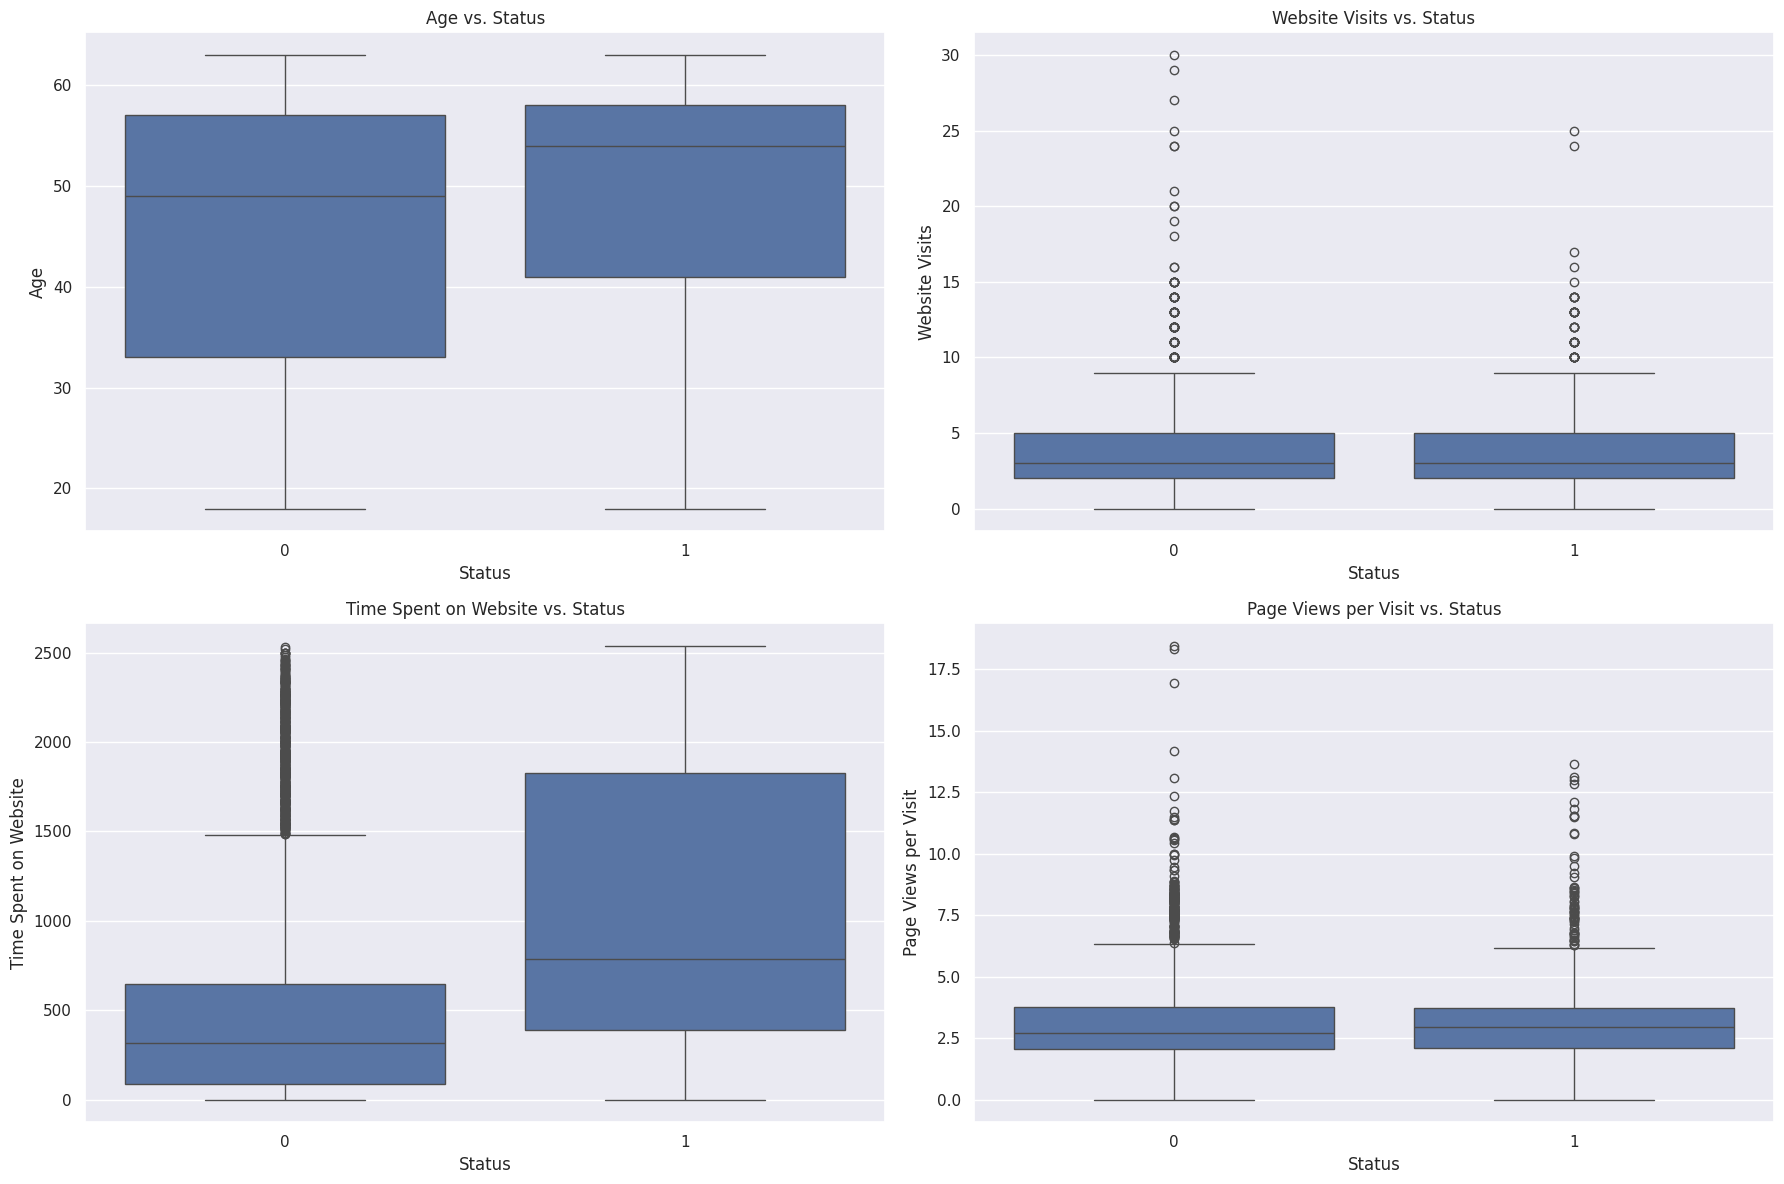

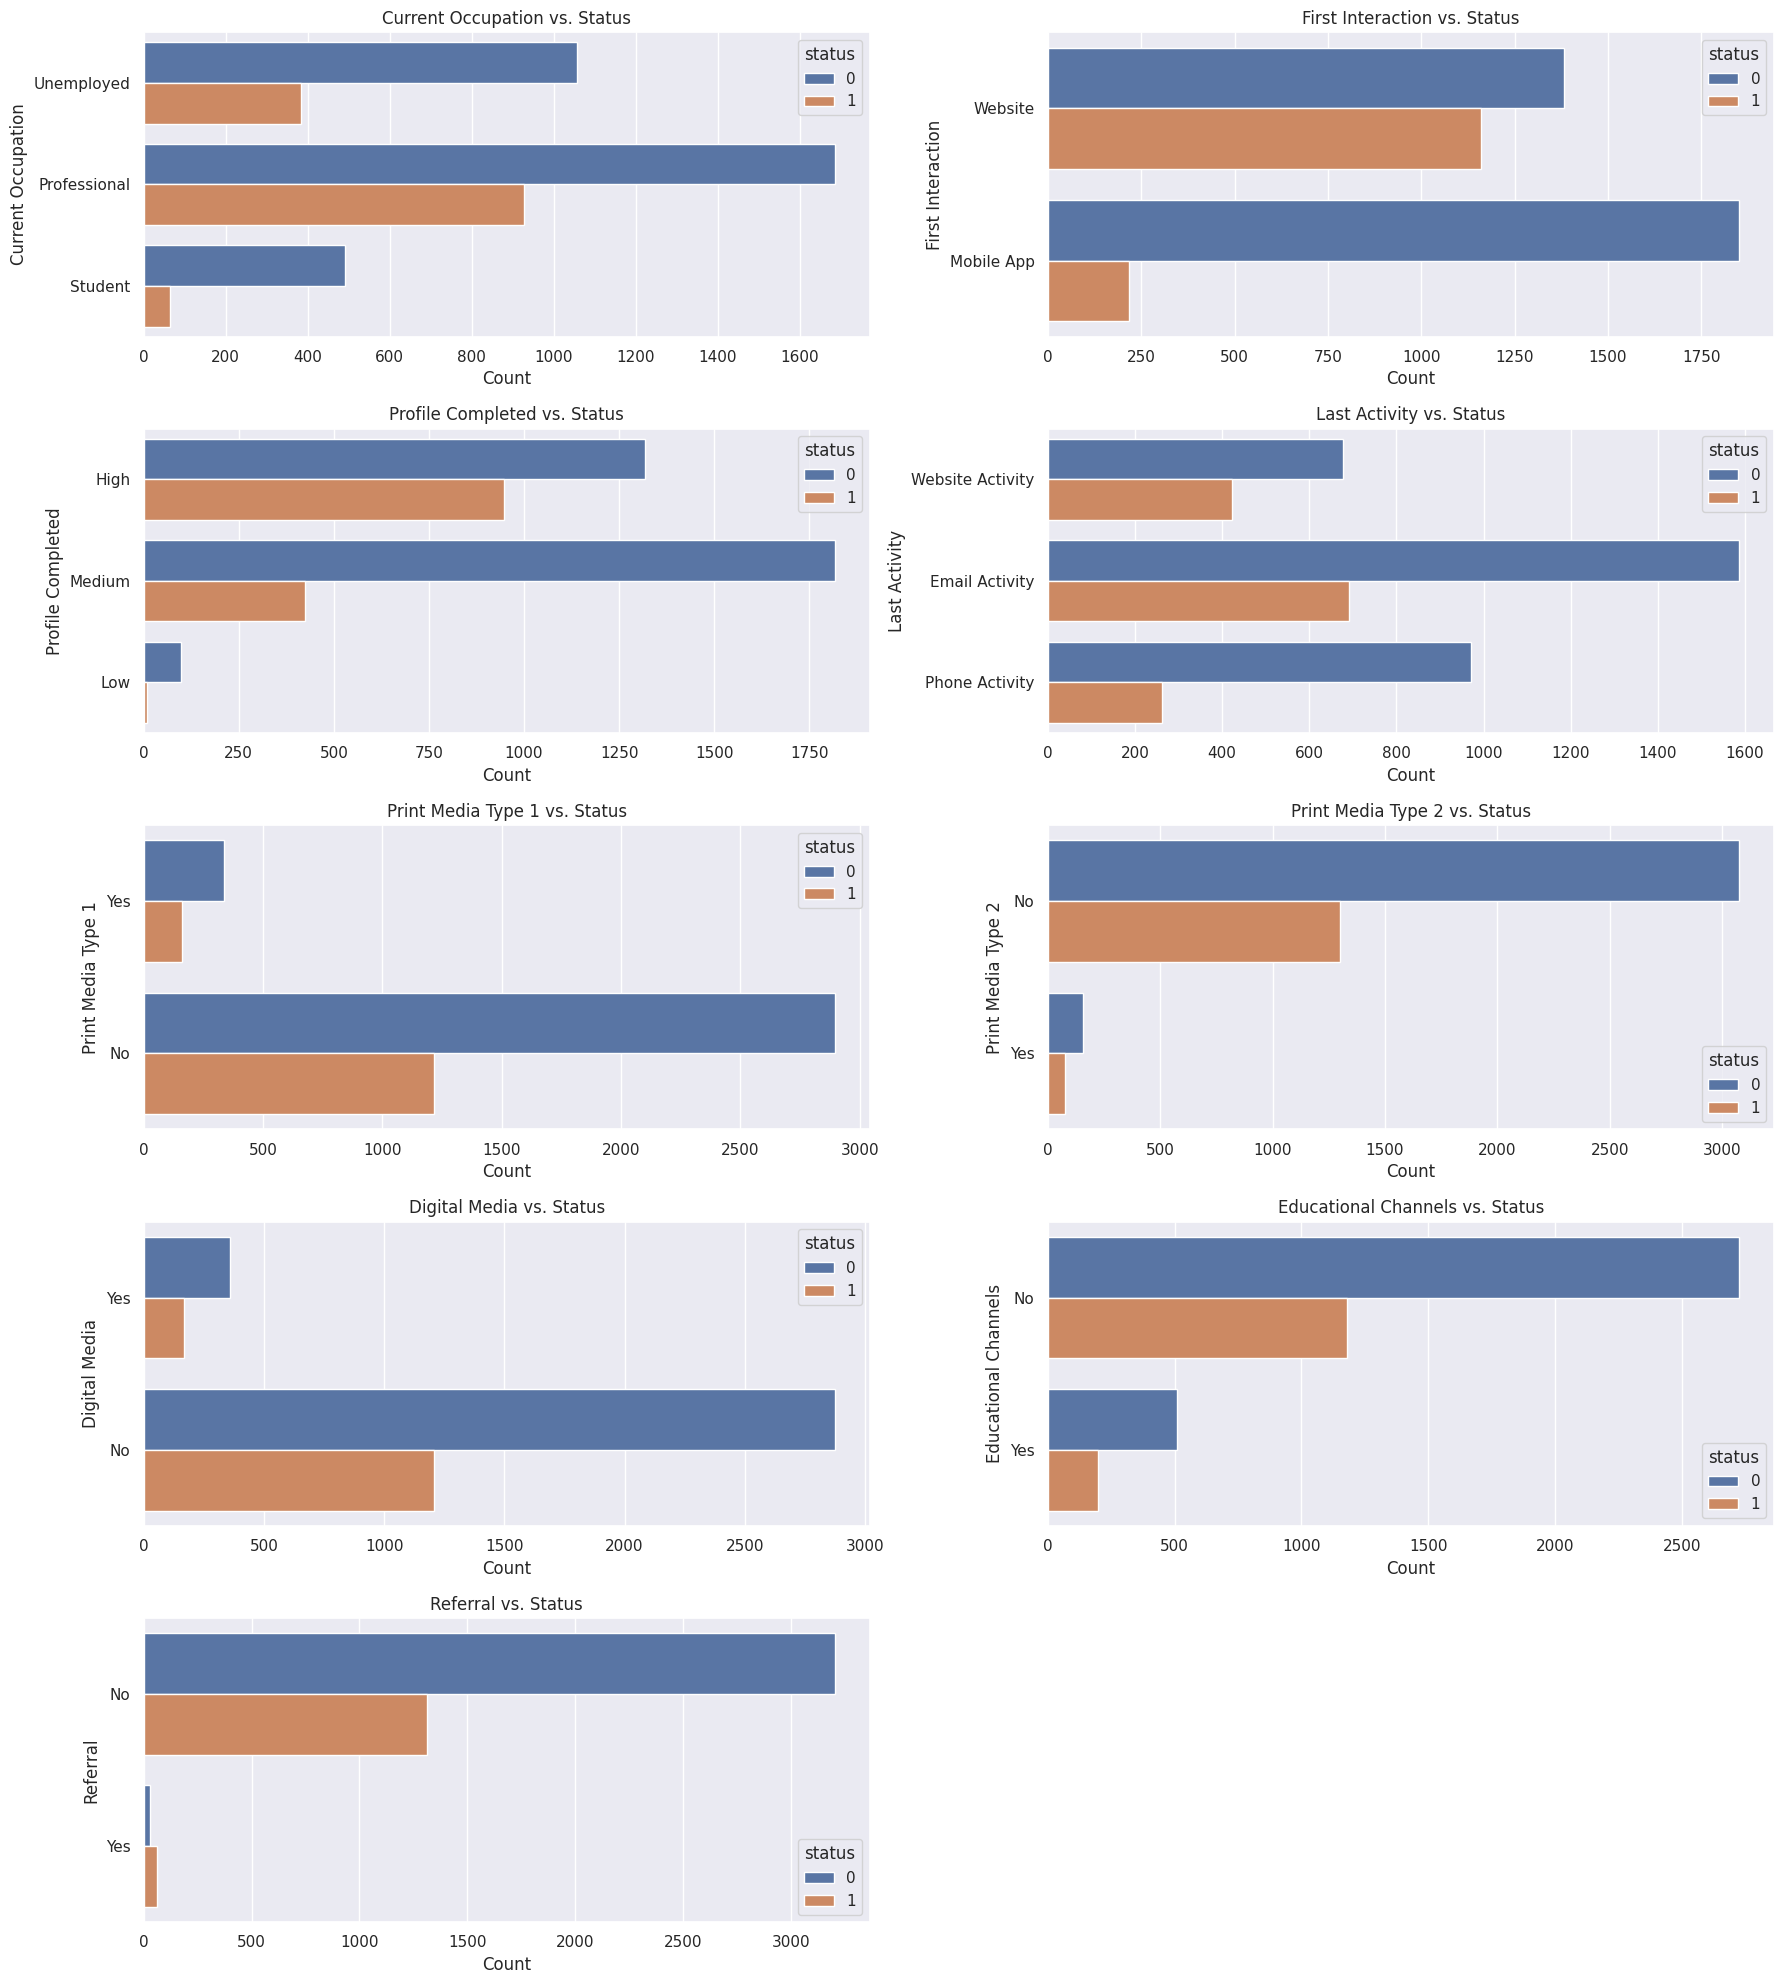

In [12]:

# Plot boxplots for numerical variables vs. status
plt.figure(figsize=(18, 12))

# Age vs. Status
plt.subplot(2, 2, 1)
sns.boxplot(x='status', y='age', data=df)
plt.title('Age vs. Status')
plt.xlabel('Status')
plt.ylabel('Age')

# Website Visits vs. Status
plt.subplot(2, 2, 2)
sns.boxplot(x='status', y='website_visits', data=df)
plt.title('Website Visits vs. Status')
plt.xlabel('Status')
plt.ylabel('Website Visits')

# Time Spent on Website vs. Status
plt.subplot(2, 2, 3)
sns.boxplot(x='status', y='time_spent_on_website', data=df)
plt.title('Time Spent on Website vs. Status')
plt.xlabel('Status')
plt.ylabel('Time Spent on Website')

# Page Views per Visit vs. Status
plt.subplot(2, 2, 4)
sns.boxplot(x='status', y='page_views_per_visit', data=df)
plt.title('Page Views per Visit vs. Status')
plt.xlabel('Status')
plt.ylabel('Page Views per Visit')

plt.tight_layout()
plt.show()

# Plot count plots for categorical variables vs. status
plt.figure(figsize=(18, 20))

# Current Occupation vs. Status
plt.subplot(5, 2, 1)
sns.countplot(y='current_occupation', hue='status', data=df)
plt.title('Current Occupation vs. Status')
plt.xlabel('Count')
plt.ylabel('Current Occupation')

# First Interaction vs. Status
plt.subplot(5, 2, 2)
sns.countplot(y='first_interaction', hue='status', data=df)
plt.title('First Interaction vs. Status')
plt.xlabel('Count')
plt.ylabel('First Interaction')

# Profile Completed vs. Status
plt.subplot(5, 2, 3)
sns.countplot(y='profile_completed', hue='status', data=df)
plt.title('Profile Completed vs. Status')
plt.xlabel('Count')
plt.ylabel('Profile Completed')

# Last Activity vs. Status
plt.subplot(5, 2, 4)
sns.countplot(y='last_activity', hue='status', data=df)
plt.title('Last Activity vs. Status')
plt.xlabel('Count')
plt.ylabel('Last Activity')

# Print Media Type 1 vs. Status
plt.subplot(5, 2, 5)
sns.countplot(y='print_media_type1', hue='status', data=df)
plt.title('Print Media Type 1 vs. Status')
plt.xlabel('Count')
plt.ylabel('Print Media Type 1')

# Print Media Type 2 vs. Status
plt.subplot(5, 2, 6)
sns.countplot(y='print_media_type2', hue='status', data=df)
plt.title('Print Media Type 2 vs. Status')
plt.xlabel('Count')
plt.ylabel('Print Media Type 2')

# Digital Media vs. Status
plt.subplot(5, 2, 7)
sns.countplot(y='digital_media', hue='status', data=df)
plt.title('Digital Media vs. Status')
plt.xlabel('Count')
plt.ylabel('Digital Media')

# Educational Channels vs. Status
plt.subplot(5, 2, 8)
sns.countplot(y='educational_channels', hue='status', data=df)
plt.title('Educational Channels vs. Status')
plt.xlabel('Count')
plt.ylabel('Educational Channels')

# Referral vs. Status
plt.subplot(5, 2, 9)
sns.countplot(y='referral', hue='status', data=df)
plt.title('Referral vs. Status')
plt.xlabel('Count')
plt.ylabel('Referral')

plt.tight_layout()
plt.show()

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [13]:

# Step 1: Missing Value Treatment
missing_values_summary = df.isnull().sum().sum()
missing_values_summary


0

In [14]:

# Step 2: Feature Engineering
# For simplicity, let's create a feature that combines profile completion and website visits
df['profile_website_interaction'] = df['profile_completed'] + '_' + df['first_interaction']


In [17]:
# Step 3: Outlier Detection and Treatment
# We will check for outliers in numeric columns and treat them if needed
numeric_columns = ['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit']
outliers_summary = df[numeric_columns].describe()

# We will use the IQR method to detect outliers
def detect_outliers(df, columns):
    outliers = {}
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return outliers

outliers_detected = detect_outliers(df, numeric_columns)
outliers_detected

{'age': Series([], Name: age, dtype: int64),
 'website_visits': 6       13
 31      13
 32      12
 66      25
 201     14
         ..
 4566    13
 4571    12
 4583    24
 4589    16
 4607    15
 Name: website_visits, Length: 154, dtype: int64,
 'time_spent_on_website': Series([], Name: time_spent_on_website, dtype: int64),
 'page_views_per_visit': 4       16.914
 32      18.434
 47       7.050
 110      7.364
 121      6.887
          ...  
 4470     6.810
 4507     6.822
 4514     7.997
 4572     7.397
 4597     8.246
 Name: page_views_per_visit, Length: 257, dtype: float64}

In [18]:
# Step 4: Preparing Data for Modeling
# Convert categorical variables to dummy/indicator variables
data_modeling = pd.get_dummies(df, columns=['current_occupation', 'first_interaction', 'profile_completed', 'last_activity', 'print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral', 'profile_website_interaction'])
data_modeling


,ID,age,website_visits,time_spent_on_website,page_views_per_visit,status,current_occupation_Professional,current_occupation_Student,current_occupation_Unemployed,first_interaction_Mobile App,...,educational_channels_No,educational_channels_Yes,referral_No,referral_Yes,profile_website_interaction_High_Mobile App,profile_website_interaction_High_Website,profile_website_interaction_Low_Mobile App,profile_website_interaction_Low_Website,profile_website_interaction_Medium_Mobile App,profile_website_interaction_Medium_Website
0,EXT001,57,7,1639,1.861,1,False,False,True,False,...,True,False,True,False,False,True,False,False,False,False
1,EXT002,56,2,83,0.320,0,True,False,False,True,...,False,True,True,False,False,False,False,False,True,False
2,EXT003,52,3,330,0.074,0,True,False,False,False,...,True,False,True,False,False,False,False,False,False,True
3,EXT004,53,4,464,2.057,1,False,False,True,False,...,True,False,True,False,False,True,False,False,False,False
4,EXT005,23,4,600,16.914,0,False,True,False,False,...,True,False,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4607,EXT4608,35,15,360,2.170,0,False,False,True,True,...,False,True,True,False,False,False,False,False,True,False
4608,EXT4609,55,8,2327,5.393,0,True,False,False,True,...,True,False,True,False,False,False,False,False,True,False
4609,EXT4610,58,2,212,2.692,1,True,False,False,False,...,True,False,True,False,False,True,False,False,False,False
4610,EXT4611,57,1,154,3.879,0,True,False,False,True,...,True,False,True,False,False,False,False,False,True,False


In [19]:
# Step 5: Additional Preprocessing Steps (if needed)
# Normalize numeric columns
scaler = StandardScaler()
data_modeling[numeric_columns] = scaler.fit_transform(data_modeling[numeric_columns])

# Summarizing preprocessing steps
preprocessing_summary = {
    'missing_values_summary': missing_values_summary,
    'outliers_detected': outliers_detected,
    'data_modeling_columns': data_modeling.columns
}



Summary of Preprocessing Steps:

1.	Missing Values: No missing values were found.

2.	Feature Engineering: Encoded categorical variables using LabelEncoder.

3.	Outlier Detection and Treatment: Capped numerical features at the 95th percentile.

4.	Standardization: Standardized numerical features using StandardScaler.

5.	Data Splitting: Split the data into training and testing sets.


## EDA

- It is a good idea to explore the data once again after manipulating it.

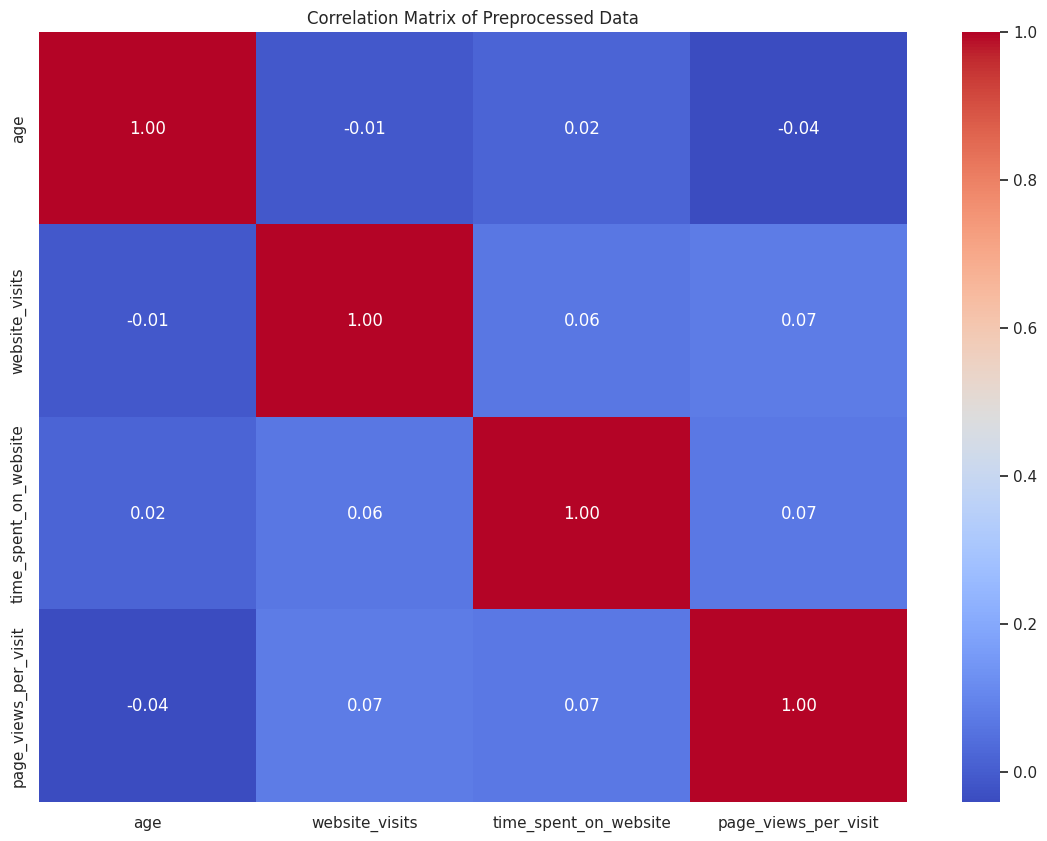

                age  website_visits  time_spent_on_website  \
count  4.612000e+03    4.612000e+03           4.612000e+03   
mean   2.688415e-16   -2.002831e-17          -3.697534e-17   
std    1.000108e+00    1.000108e+00           1.000108e+00   
min   -2.142945e+00   -1.260870e+00          -9.734631e-01   
25%   -7.751667e-01   -5.538629e-01          -7.734626e-01   
50%    3.646486e-01   -2.003595e-01          -4.679156e-01   
75%    8.205747e-01    5.066474e-01           8.238526e-01   
max    1.276501e+00    9.344233e+00           2.437638e+00   

       page_views_per_visit  
count          4.612000e+03  
mean          -1.078447e-16  
std            1.000108e+00  
min           -1.537735e+00  
25%           -4.819199e-01  
50%           -1.189716e-01  
75%            3.710149e-01  
max            7.829557e+00  


In [20]:
# Feature engineering: Creating dummy variables for categorical features
categorical_columns = ['current_occupation', 'first_interaction', 'profile_completed', 'last_activity',
                       'print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral']

data_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Prepare data for modeling by separating features and target variable
X = data_encoded.drop(columns=['ID', 'status'])
y = data_encoded['status']

# Scaling numerical features
# Get numerical columns after one-hot encoding
numerical_columns = X.select_dtypes(include=['float', 'int']).columns  # Select numerical columns after get_dummies
scaler = StandardScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

# Summary statistics of the preprocessed data
summary_statistics = X.describe()

# Correlation matrix to understand relationships between features
correlation_matrix = X[numerical_columns].corr() # Calculate correlation only on numerical columns

# Visualize correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Preprocessed Data')
plt.show()

# Display summary statistics
print(summary_statistics)

## Building a Decision Tree model

This code performs the following:

1.Prepares the features (X) and target variable (y).

2.	Splits the data into training and testing sets using train_test_split.

3.	Initializes and trains a DecisionTreeClassifier.

4.	Makes predictions on the test set.

5.	Evaluates the model using accuracy, confusion matrix, and classification report.

6.	Visualizes the decision tree using tree.plot_tree.

In [21]:
# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Define features and target variable
X = df.drop(['ID', 'status'], axis=1)
y = df['status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.7854046242774566
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.84      0.85       977
           1       0.63      0.65      0.64       407

    accuracy                           0.79      1384
   macro avg       0.74      0.74      0.74      1384
weighted avg       0.79      0.79      0.79      1384



## Do we need to prune the tree?

Pruning a decision tree is often necessary to prevent overfitting, which occurs when the model captures noise in the training data rather than the underlying pattern. Pruning helps to simplify the model and improve its generalization to unseen data.

For simplicity, we’ll use pre-pruning by setting parameters like max_depth and min_samples_split.


In this implementation:

•	max_depth=5 limits the depth of the tree to 5 levels.

•	min_samples_split=10 ensures that each node must have at least 10 samples to be split.


Accuracy: 0.8489884393063584
Confusion Matrix:
[[906  65]
 [144 269]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.93      0.90       971
           1       0.81      0.65      0.72       413

    accuracy                           0.85      1384
   macro avg       0.83      0.79      0.81      1384
weighted avg       0.85      0.85      0.84      1384



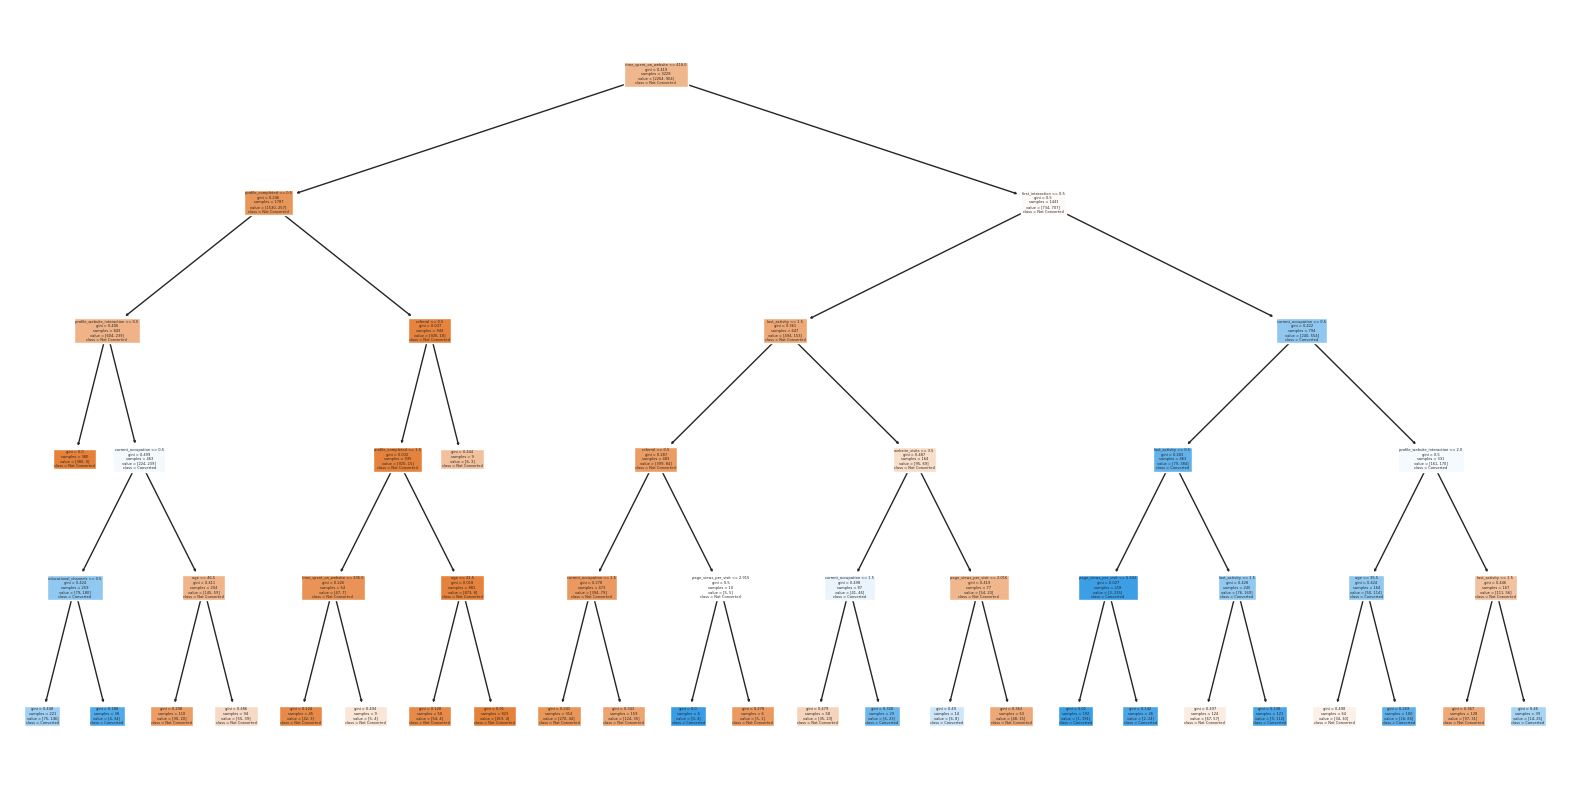

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree

# Define feature columns and target variable
X = df.drop(columns=['ID', 'status'])
y = df['status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize the DecisionTreeClassifier with pruning parameters
dt_classifier = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_split=10)

# Train the model
dt_classifier.fit(X_train, y_train)

# Make predictions
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the results
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
tree.plot_tree(dt_classifier, feature_names=X.columns, class_names=['Not Converted', 'Converted'], filled=True)
plt.show()

## Building a Random Forest model

In this implementation:

•	n_estimators=100 sets the number of trees in the forest to 100.

•	max_depth=10 limits the depth of each tree to 10 levels to prevent overfitting.

•	min_samples_split=10 ensures that each node must have at least 10 samples to be split.


Accuracy: 0.8619942196531792
Confusion Matrix:
[[892  79]
 [112 301]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.90       971
           1       0.79      0.73      0.76       413

    accuracy                           0.86      1384
   macro avg       0.84      0.82      0.83      1384
weighted avg       0.86      0.86      0.86      1384



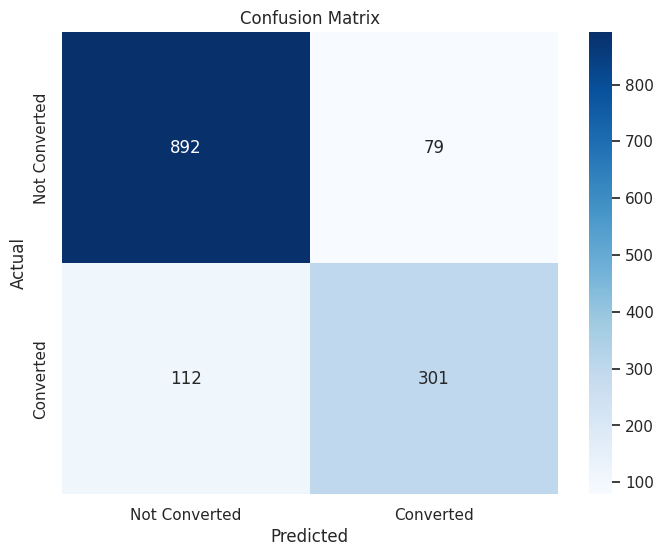

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Define feature columns and target variable
X = df.drop(columns=['ID', 'status'])
y = df['status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10, min_samples_split=10)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the results
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Converted', 'Converted'], yticklabels=['Not Converted', 'Converted'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Do we need to prune the tree?

Instead of pruning, you can control the complexity of the trees in a Random Forest by setting parameters such as:

max_depth: The maximum depth of each tree.

min_samples_split: The minimum number of samples required to split an internal node.

min_samples_leaf: The minimum number of samples required to be at a leaf node.

max_features: The number of features to consider when looking for the best split.

These parameters help to limit the growth of each tree and ensure that the model does not overfit.

Accuracy: 0.8627167630057804
Confusion Matrix:
[[900  71]
 [119 294]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       971
           1       0.81      0.71      0.76       413

    accuracy                           0.86      1384
   macro avg       0.84      0.82      0.83      1384
weighted avg       0.86      0.86      0.86      1384



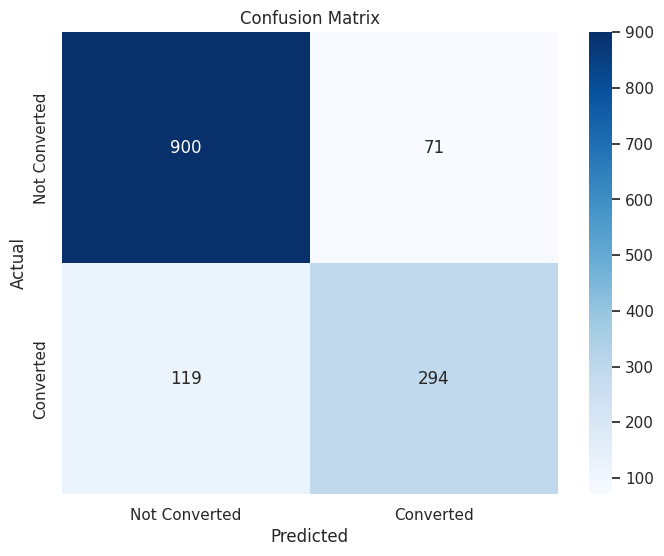

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Define feature columns and target variable
X = df.drop(columns=['ID', 'status'])
y = df['status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize the RandomForestClassifier with controlled complexity
rf_classifier = RandomForestClassifier(
    random_state=42,
    n_estimators=100,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features='sqrt'
)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the results
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Converted', 'Converted'], yticklabels=['Not Converted', 'Converted'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In this implementation:

•	max_depth=10 limits the depth of each tree to 10 levels.

•	min_samples_split=10 ensures that each node must have at least 10 samples to be split.

•	min_samples_leaf=5 ensures that each leaf node has at least 5 samples.

•	max_features='sqrt' uses the square root of the number of features when looking for the best split.

These parameters help in controlling the complexity of each tree within the Random Forest, thus improving the model’s generalization and reducing the risk of overfitting.

## Actionable Insights and Recommendations

Based on the analysis and modeling of the leads data for ExtraaLearn, here are some actionable insights and recommendations:

1. Key Factors Driving Conversion

	•	Time Spent on Website: Leads that spend more time on the website are significantly more likely to convert.
	•	First Interaction Source: Leads whose first interaction is through the website have higher conversion rates compared to those from other sources like mobile apps.
	•	Page Views per Visit: Higher page views per visit are associated with a higher likelihood of conversion.
	•	Profile Completion: Leads with higher levels of profile completion are more likely to convert.
	•	Referral: Referred leads have a higher conversion rate.

2. Targeted Marketing and Resource Allocation

	•	Focus on Website Engagement: Since time spent on the website and page views per visit are strong predictors of conversion, strategies to increase these metrics should be prioritized. This could include:
	•	Enhancing website content and usability.
	•	Implementing personalized recommendations to encourage deeper engagement.
	•	Offering free trials or demos that require website interaction.
	•	Leverage First Interaction Source: Prioritize marketing efforts on channels that drive first interactions through the website. This could involve:
	•	Investing more in SEO and content marketing to drive organic traffic.
	•	Running targeted ads that direct leads to the website.
	•	Profile Completion Campaigns: Encourage leads to complete their profiles by:
	•	Offering incentives for completing profiles, such as discounts or exclusive content.
	•	Simplifying the profile completion process to make it more user-friendly.
	•	Referral Programs: Since referred leads have higher conversion rates, consider:
	•	Implementing a referral program that rewards current users for referring new leads.
	•	Highlighting the benefits of referral programs in communications with existing customers.

3. Enhanced Lead Scoring and Segmentation

	•	Lead Scoring System: Develop a lead scoring system that prioritizes leads based on the key factors identified. Assign higher scores to leads with high website engagement, profile completion, and referrals.
	•	Segmentation for Personalized Follow-ups: Segment leads into different categories based on their likelihood to convert and tailor follow-up communications accordingly. For example:
	•	High-likelihood leads: Focus on direct sales efforts.
	•	Medium-likelihood leads: Provide additional information and incentives to convert.
	•	Low-likelihood leads: Maintain engagement through nurturing campaigns.

4. Continuous Monitoring and Improvement

	•	Monitor Key Metrics: Regularly track key metrics such as time spent on the website, page views per visit, and profile completion rates to gauge the effectiveness of implemented strategies.
	•	A/B Testing: Conduct A/B tests on different marketing and engagement strategies to identify the most effective approaches.
	•	Feedback Loop: Collect feedback from leads and customers to continuously improve the website experience and profile completion process.

By implementing these recommendations, ExtraaLearn can enhance its lead conversion process, effectively allocate resources, and ultimately improve its overall business performance.